### Decision Tree 실습

In [7]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

In [4]:
tree = DecisionTreeClassifier(
    max_depth=3,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

In [5]:
tree.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,5
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [6]:
tree.score(X_test, y_test)

1.0

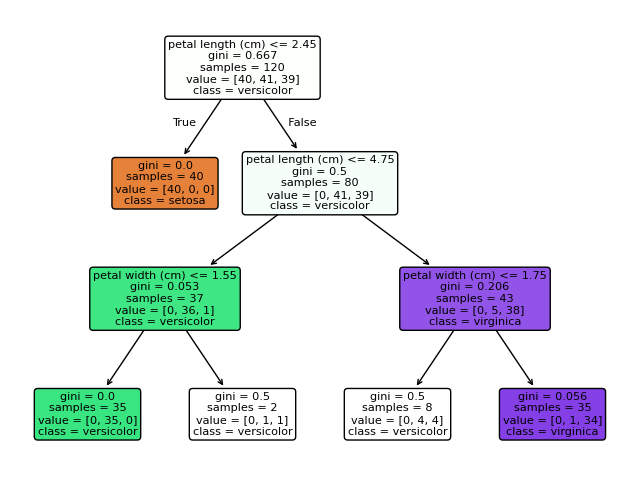

In [9]:
plt.figure(figsize=(8,6))
plot_tree(
    tree,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled = True, # 색상
    rounded = True
)
plt.show()

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 데이터 로드
iris = load_iris()
X, y = iris.data, iris.target

# LDA (4 클래스 → 2차원으로 축소)
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)

print(f"원본: {X.shape}")
print(f"LDA 후: {X_lda.shape}")

원본: (150, 4)
LDA 후: (150, 2)


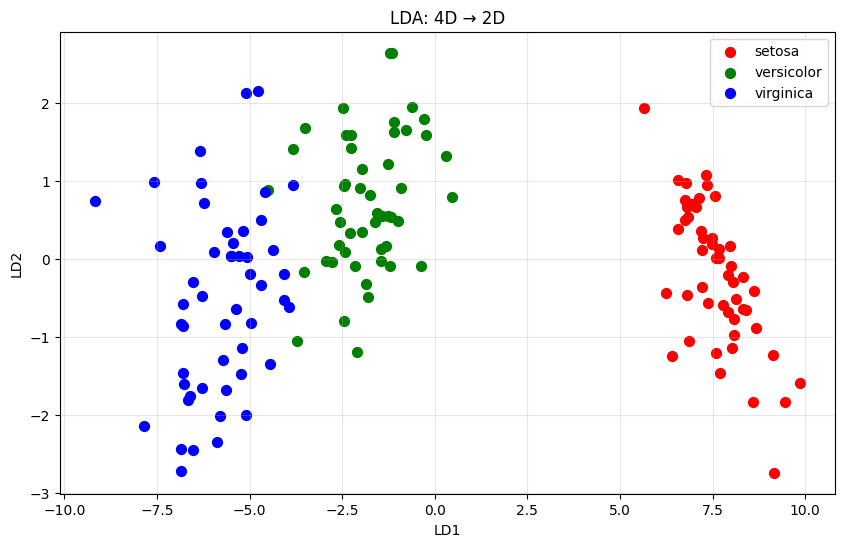

In [12]:
# 시각화
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue']
for i in range(3):
    plt.scatter(X_lda[y==i, 0], X_lda[y==i, 1], 
               c=colors[i], label=iris.target_names[i], s=50)
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('LDA: 4D → 2D')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

---
### KNN 실습

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [19]:
scores = []

for i in range(1, 30):
    knn = KNeighborsClassifier(i)
    score = cross_val_score(knn, X_train, y_train, scoring='accuracy').mean()
    scores.append(score)

scores

[np.float64(0.95),
 np.float64(0.95),
 np.float64(0.9583333333333334),
 np.float64(0.95),
 np.float64(0.9416666666666667),
 np.float64(0.9416666666666667),
 np.float64(0.9416666666666667),
 np.float64(0.9333333333333333),
 np.float64(0.9333333333333333),
 np.float64(0.9333333333333333),
 np.float64(0.95),
 np.float64(0.9416666666666667),
 np.float64(0.9416666666666667),
 np.float64(0.9416666666666667),
 np.float64(0.9416666666666667),
 np.float64(0.9416666666666667),
 np.float64(0.9416666666666667),
 np.float64(0.9416666666666667),
 np.float64(0.9416666666666667),
 np.float64(0.9416666666666667),
 np.float64(0.95),
 np.float64(0.925),
 np.float64(0.9333333333333333),
 np.float64(0.9166666666666667),
 np.float64(0.9416666666666667),
 np.float64(0.9333333333333333),
 np.float64(0.9416666666666667),
 np.float64(0.9333333333333333),
 np.float64(0.9333333333333333)]

In [20]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [22]:
knn.score(X_test, y_test)

1.0

In [23]:
knn.predict(X_test)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [24]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

---
## LDA 정확도 구하기

In [46]:
X, y = iris.data, iris.target

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
lda = LinearDiscriminantAnalysis(n_components=2)

In [38]:
lda.fit(X_train, y_train)

,solver,'svd'
,shrinkage,None
,priors,None
,n_components,2
,store_covariance,False
,tol,0.0001
,covariance_estimator,None


In [39]:
lda.score(X_test, y_test)

0.9833333333333333

---
## Tree

In [44]:
scores = []
for i in range(1, 6):
    tree = DecisionTreeClassifier(
        max_depth=i,
        min_samples_split=5,
        min_samples_leaf=2
    )
    tree.fit(X_train, y_train)
    scores.append(tree.score(X_test, y_test))

scores

[0.6333333333333333, 0.9666666666666667, 1.0, 1.0, 1.0]

---

In [50]:
scores = []
for i in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy').mean()
    scores.append(score)

scores

[np.float64(0.95),
 np.float64(0.95),
 np.float64(0.9583333333333334),
 np.float64(0.95),
 np.float64(0.9416666666666667),
 np.float64(0.9416666666666667),
 np.float64(0.9416666666666667),
 np.float64(0.9333333333333333),
 np.float64(0.9333333333333333),
 np.float64(0.9333333333333333),
 np.float64(0.95),
 np.float64(0.9416666666666667),
 np.float64(0.9416666666666667),
 np.float64(0.9416666666666667),
 np.float64(0.9416666666666667),
 np.float64(0.9416666666666667),
 np.float64(0.9416666666666667),
 np.float64(0.9416666666666667),
 np.float64(0.9416666666666667),
 np.float64(0.9416666666666667),
 np.float64(0.95),
 np.float64(0.925),
 np.float64(0.9333333333333333),
 np.float64(0.9166666666666667),
 np.float64(0.9416666666666667),
 np.float64(0.9333333333333333),
 np.float64(0.9416666666666667),
 np.float64(0.9333333333333333),
 np.float64(0.9333333333333333),
 np.float64(0.9166666666666667)]